In [1]:
# !pip install catboost

In [2]:
#import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import time
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('max_rows', 500) 

# Exploratory Data Analysis
## 1. Getting the data

In [3]:
winter_data = pd.read_csv(
    'P:/Betty/Clothing_Jayson/IndividualClothingBinary+3Binary.csv', index_col=0)


In [4]:
winter_data.shape

(2038, 34)

In [5]:
winter_data.head()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Socks,Thermal,Vest,FullSweater,SwC,TSV,TPV,TCV,TSL,MC
SNo,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1.0,1,1,1.0,1,-1,2,2,1,2
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1.0,1,1,0.0,1,-1,2,3,1,2
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1.0,1,1,0.0,2,0,1,2,3,4
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,...,1.0,1,1,0.0,2,0,0,2,2,4
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,...,1.0,1,1,0.0,2,0,1,2,2,2


In [6]:
winter_data.describe()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Socks,Thermal,Vest,FullSweater,SwC,TSV,TPV,TCV,TSL,MC
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,...,2037.0,2038.000000,2038.000000,2037.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,2.732581,2.709519,0.733562,2.299313,21.217076,6.254809,61.204711,14.496075,3.947007,9.524043,...,1.0,0.584887,0.591757,0.464899,1.965653,-0.326300,0.693817,2.119235,1.996075,3.572620
std,1.309543,1.285857,0.442204,1.252473,1.744861,1.715494,7.081575,1.203274,0.797110,1.049188,...,0.0,0.492862,0.491629,0.498889,0.301848,0.612427,0.691821,0.766258,0.822478,1.014077
min,1.000000,1.000000,0.000000,1.000000,17.600000,4.200000,44.230000,12.800000,3.000000,6.000000,...,1.0,0.000000,0.000000,0.000000,1.000000,-2.000000,-1.000000,-3.000000,-2.000000,1.000000
25%,2.000000,1.000000,0.000000,1.000000,20.500000,5.000000,58.200000,13.600000,3.000000,9.000000,...,1.0,0.000000,0.000000,0.000000,2.000000,-1.000000,0.000000,2.000000,2.000000,4.000000
50%,3.000000,3.000000,1.000000,2.000000,21.200000,5.600000,60.600000,14.100000,4.000000,10.000000,...,1.0,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,1.000000,3.000000,22.400000,6.600000,65.400000,15.100000,5.000000,10.000000,...,1.0,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,3.000000,2.000000,4.000000
max,5.000000,5.000000,1.000000,6.000000,24.200000,10.100000,75.600000,17.500000,5.000000,13.000000,...,1.0,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000


In [7]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DAY                        2038 non-null   int64  
 1   School                     2038 non-null   int64  
 2   SchoolType                 2038 non-null   int64  
 3   StartTime                  2038 non-null   int64  
 4   AvgMaxDailyTemp            2038 non-null   float64
 5   AvgMinDailyTemp            2038 non-null   float64
 6   AvgIndoorRelativeHumidity  2038 non-null   float64
 7   IndoorTempDuringSurvey     2038 non-null   float64
 8   Grade                      2038 non-null   int64  
 9   Age                        2038 non-null   int64  
 10  Gender                     2038 non-null   int64  
 11  FormalClothing             2038 non-null   int64  
 12  Scarf/Cap                  2038 non-null   int64  
 13  Tie                        2038 non-null   int64

In [8]:
winter_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Scarf/Cap', 'Tie', 'Stockings', 'Pant', 'Trackpant', 'Halfshirt',
       'Blazer', 'Jacket', 'Skirt', 'FullShirt', 'HalfSweater', 'Tshirt',
       'Socks', 'Thermal', 'Vest', 'FullSweater', 'SwC', 'TSV', 'TPV', 'TCV',
       'TSL', 'MC'],
      dtype='object')

In [9]:
winter_data = winter_data.astype({
    'DAY':'category',
    'School':'category',
    'SchoolType': 'category',
    'StartTime': 'category',
    'Grade': 'category',
    'Gender': 'category',
    'FormalClothing': 'bool',
    'Pant': 'bool',
    'Trackpant': 'bool',
    'Halfshirt': 'bool',
    'Blazer': 'bool',
    'Jacket': 'bool',
    'Skirt': 'bool',
    'FullShirt': 'bool',
    'HalfSweater': 'bool',
    'Tshirt': 'bool',
    'Socks': 'bool',
    'Thermal': 'bool',
    'Vest': 'bool',
    'FullSweater': 'bool',
    'TSV':'category',
    'TPV':'category',
    'TCV':'category',
    'TSL':'category',
    'MC':'category',
    'SwC':'category',
})

In [10]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   DAY                        2038 non-null   category
 1   School                     2038 non-null   category
 2   SchoolType                 2038 non-null   category
 3   StartTime                  2038 non-null   category
 4   AvgMaxDailyTemp            2038 non-null   float64 
 5   AvgMinDailyTemp            2038 non-null   float64 
 6   AvgIndoorRelativeHumidity  2038 non-null   float64 
 7   IndoorTempDuringSurvey     2038 non-null   float64 
 8   Grade                      2038 non-null   category
 9   Age                        2038 non-null   int64   
 10  Gender                     2038 non-null   category
 11  FormalClothing             2038 non-null   bool    
 12  Scarf/Cap                  2038 non-null   int64   
 13  Tie                        2038 n

## Distributions of Numerical Features

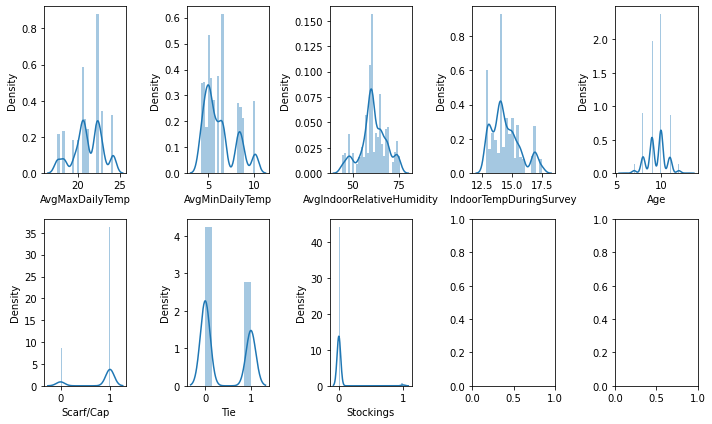

In [11]:
# create a new dataframe with columns containing only the numerical features
num_features = winter_data.select_dtypes(exclude=['bool', 'category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for i in range(len(num_features.columns)):
    plt.subplot(2, 5, i+1)
    sns.distplot(num_features.iloc[:,i].dropna())
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

## Distributions of Categorical Features

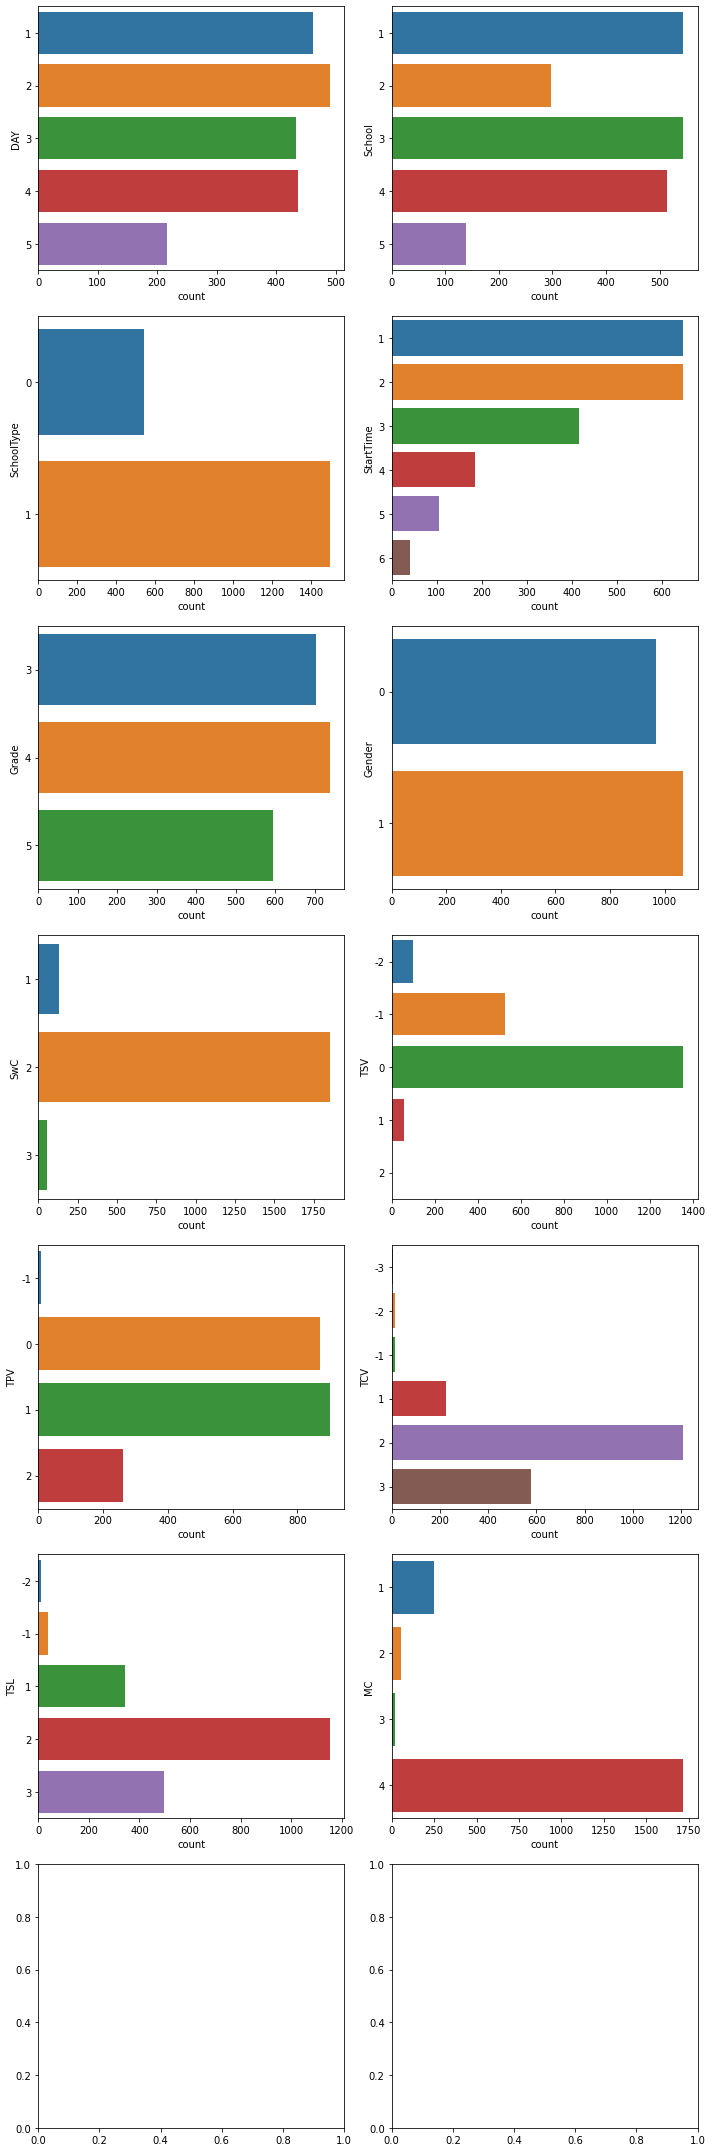

In [12]:
# create a new dataframe with columns containing only the categorical features
cat_features = winter_data.select_dtypes(include=['category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(cat_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=cat_features.columns[i], data=cat_features)
    
plt.tight_layout()
plt.show()

## Distributions of Boolean Features

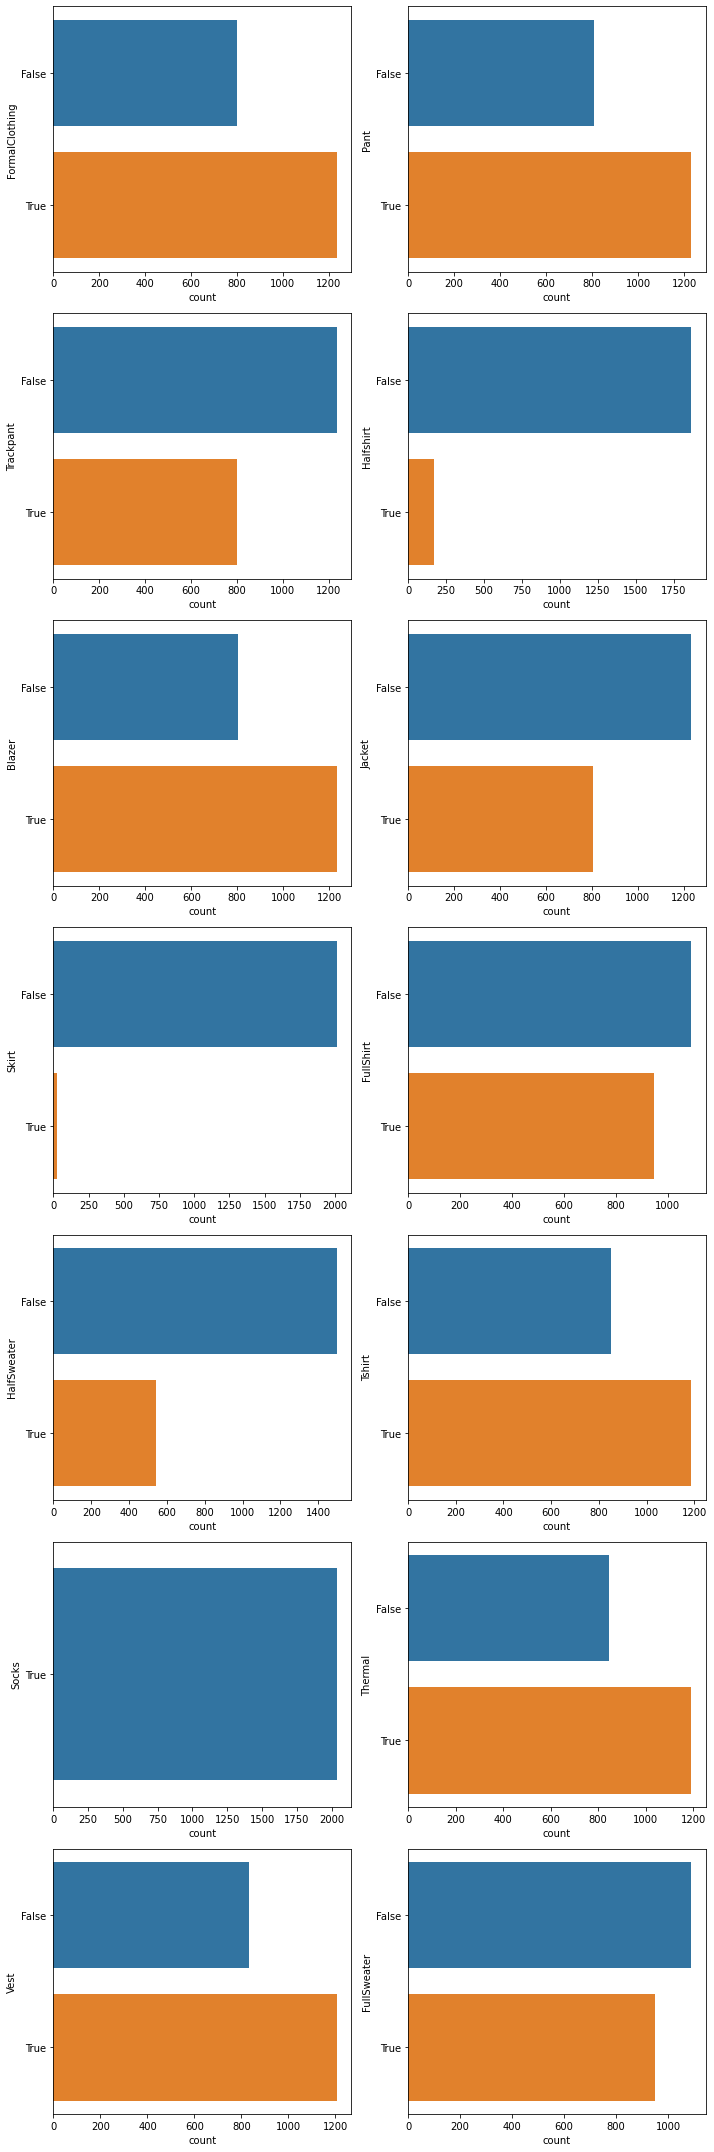

In [13]:
# create a new dataframe with columns containing only the categorical features
bool_features = winter_data.select_dtypes(include='bool').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(bool_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=bool_features.columns[i], data=bool_features)
    
plt.tight_layout()
plt.show()

In [14]:
tsl_target_data = winter_data.copy()

## Machine Learning Models (CatBoost)

In [15]:
import catboost as cat
# Classification metrics 
from sklearn.metrics import precision_score, cohen_kappa_score, f1_score, accuracy_score, recall_score
# Helper for cross-validation
from sklearn.model_selection import StratifiedKFold

In [16]:
def oof_trainer(X: pd.DataFrame,
                y,
            n_folds = None,
            params: dict = None,
            del_cols: list = None,
            cat_features=None):
    
    """This function trains multiple Catboost model while performing stratified CV with shuffling.
    out-of-fold (oof) predictions are evaluated at each fold and printed out 
    at the end of the routine as a list. The mean scores on all fold is also printed out.
    
    The metrics used for evaluation are precision_auc and the cohen's kappa
    
    Output: 
    models -- a list of models trained on each fold during CV
    oof_pred -- prediction array consisting of predictions coming from different models
    """
        
    # collect models and scores from each fold
    models = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    scores = []
    # CV splitter
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=505) #GroupKFold(n_splits=n_folds) 
    #features to use
    columns = [col for col in X.columns.values if not col in del_cols]
    # dimension of the target 
    n_target=1
    
    # collect out-of-sample predictions
    data_X, data_y, oof_pred = pd.DataFrame(), pd.Series(), np.zeros((len(X),n_target))


    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
     
        print('Fold {} started at {}'.format(fold_n + 1,time.ctime()))
        #print((train_index, valid_index))
        X_train, X_valid = X.iloc[train_index][columns], X.iloc[valid_index][columns]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        data_X = data_X.append(X_valid)
        data_y = data_y.append(y_valid)
        print(data_X.shape)
        
        #Eval set preparation
        eval_set = [(X_train, y_train)]
       # eval_names = ['train']
        eval_set.append((X_valid, y_valid))
       # eval_names.append('valid')
    
        model = cat.CatBoostClassifier()
        model.fit(X=X_train, y=y_train, 
                       eval_set=eval_set, 
                       verbose=500, early_stopping_rounds=150,
                      cat_features=cat_features, use_best_model=True, plot=True)
        
        oof_pred[valid_index] = model.predict(X_valid).reshape(-1, n_target)
        models.append(model)
    
        print('-'*30)
        
        scores.append(cohen_kappa_score(y_valid, oof_pred[valid_index], weights='quadratic'))
        f1_scores.append(f1_score(y_valid, oof_pred[valid_index],   average=None))
        accuracy_scores.append(accuracy_score(y_valid, oof_pred[valid_index]))
        precision_scores.append(precision_score(y_valid, oof_pred[valid_index],   average=None))
        recall_scores.append(recall_score(y_valid, oof_pred[valid_index],   average=None))

    print(f'catb fold kappa scores: {scores}')
    print(f'catb fold kappa scores mean: {np.mean(scores)}')
    print(f'catb fold f1 scores: {f1_scores}')
    print(f'catb fold f1 scores mean: {np.mean(f1_scores)}')
    print(f'catb fold precision-micro scores: {precision_scores}')
    print(f'catb fold precision-micro scores mean: {np.mean(precision_scores)}')
    print(f'catb fold recall-micro scores: {recall_scores}')
    print(f'catb fold recall-micro scores mean: {np.mean(recall_scores)}')
    print(f'catb fold accuracy scores: {accuracy_scores}')
    print(f'catb fold accuracy scores mean: {np.mean(accuracy_scores)}')
   
    return models, oof_pred


In [17]:
tsl_target_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Scarf/Cap', 'Tie', 'Stockings', 'Pant', 'Trackpant', 'Halfshirt',
       'Blazer', 'Jacket', 'Skirt', 'FullShirt', 'HalfSweater', 'Tshirt',
       'Socks', 'Thermal', 'Vest', 'FullSweater', 'SwC', 'TSV', 'TPV', 'TCV',
       'TSL', 'MC'],
      dtype='object')

# Target: TSL

In [18]:
# feature selection for Catboost
models, oof_pred = oof_trainer(X=tsl_target_data,
                    y=tsl_target_data.TSL,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TPV','TCV', 'TSL'],
                    cat_features=cat_features.drop(columns=['TSV',
       'TPV','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:05:44 2022
(408, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5145402	test: 1.5145402	test1: 1.5170681	best: 1.5170681 (0)	total: 207ms	remaining: 3m 26s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.017726892
bestIteration = 111

Shrink model to first 112 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:05:59 2022
(816, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5106325	test: 1.5093089	test1: 1.5119096	best: 1.5119096 (0)	total: 48.4ms	remaining: 48.4s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9952841146
bestIteration = 170

Shrink model to first 171 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:06:16 2022
(1224, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5109853	test: 1.5095867	test1: 1.5109379	best: 1.5109379 (0)	total: 36.8ms	remaining: 36.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.016996745
bestIteration = 101

Shrink model to first 102 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:06:29 2022
(1631, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5156932	test: 1.5156932	test1: 1.5221688	best: 1.5221688 (0)	total: 42.4ms	remaining: 42.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.009527722
bestIteration = 135

Shrink model to first 136 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:06:45 2022
(2038, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5177125	test: 1.5152798	test1: 1.5192609	best: 1.5192609 (0)	total: 58.7ms	remaining: 58.6s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.013799042
bestIteration = 143

Shrink model to first 144 iterations.
------------------------------
catb fold kappa scores: [0.11457255856403992, 0.16518731988472624, 0.06931040533426924, 0.08846584546472569, 0.11245775449387929]
catb fold kappa scores mean: 0.10999877674832807
catb fold f1 scores: [array([0.        , 0.        , 0.10810811, 0.72374798, 0.14159292]), array([0.        , 0.        , 0.25      , 0.71547421, 0.15384615]), array([0.        , 0.        , 0.10126582, 0.70529801, 0.14634146]), array([0.        , 0.        , 0.125     , 0.71260504, 0.18604651]), array([0.        , 0.        , 0.33333333, 0.71527778, 0.18181818])]
catb fold f1 scores mean: 0.2119902207436482
catb fold precision-micro scores: [array([0.        , 0.        , 0.8       , 0.57583548, 0.57142857]), ar

## Feature importance

In [19]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,10.879810
1,DAY,8.843834
2,Grade,8.529234
3,StartTime,8.458379
4,IndoorTempDuringSurvey,7.328193
5,AvgIndoorRelativeHumidity,6.824866
6,Gender,5.859572
7,Age,4.942826
8,Vest,4.738290
9,AvgMaxDailyTemp,4.727245


# Target: TPV

In [20]:
# feature selection for Catboost
# Remove all rows with TPV value -1
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TPV != -1],
                    y=tsl_target_data[tsl_target_data.TPV != -1].TPV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:07:01 2022
(406, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0746687	test: 1.0744597	test1: 1.0765688	best: 1.0765688 (0)	total: 32.8ms	remaining: 32.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9343882894
bestIteration = 150

Shrink model to first 151 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:07:17 2022
(812, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0744848	test: 1.0747779	test1: 1.0774786	best: 1.0774786 (0)	total: 80.2ms	remaining: 1m 20s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9163259227
bestIteration = 178

Shrink model to first 179 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:07:36 2022
(1218, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0742369	test: 1.0749279	test1: 1.0788213	best: 1.0788213 (0)	total: 51.9ms	remaining: 51.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9301146333
bestIteration = 108

Shrink model to first 109 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:07:48 2022
(1624, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0740932	test: 1.0752180	test1: 1.0764387	best: 1.0764387 (0)	total: 67.7ms	remaining: 1m 7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9246359139
bestIteration = 131

Shrink model to first 132 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:08:01 2022
(2029, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109028
0:	learn: 1.0760559	test: 1.0760559	test1: 1.0759383	best: 1.0759383 (0)	total: 35.1ms	remaining: 35s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9057263003
bestIteration = 146

Shrink model to first 147 iterations.
------------------------------
catb fold kappa scores: [0.17968236068038723, 0.260086939635212, 0.20847934455357575, 0.1766477185435551, 0.25411996316641805]
catb fold kappa scores mean: 0.21580326531582963
catb fold f1 scores: [array([0.51343284, 0.56585366, 0.17910448]), array([0.5984252 , 0.54098361, 0.18461538]), array([0.55367232, 0.55308642, 0.03773585]), array([0.54131054, 0.56345178, 0.14925373]), array([0.59610028, 0.58163265, 0.10169492])]
catb fold f1 scores mean: 0.41735690942380077
catb fold precision-micro scores: [array([0.5308642 , 0.50434783, 0.42857143]), array([0.55072464, 0.52941176, 0.5       ]), array([0.54444444, 0.49777778, 1.        ]), array([0.53672316, 0.51869159, 0.33333333]), array([0.57526

In [21]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,12.095649
1,DAY,8.986043
2,StartTime,7.228261
3,Grade,6.177127
4,AvgIndoorRelativeHumidity,5.788876
5,SwC,5.471767
6,Age,5.349737
7,Gender,4.902219
8,MC,4.840902
9,Thermal,4.615847


# Target: TSV

In [22]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TSV != 2],
                    y=tsl_target_data[tsl_target_data.TSV != 2].TSV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:08:16 2022
(408, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2814548	test: 1.2814548	test1: 1.2813314	best: 1.2813314 (0)	total: 24ms	remaining: 23.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7553288469
bestIteration = 203

Shrink model to first 204 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:08:34 2022
(816, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2877074	test: 1.2877074	test1: 1.2912962	best: 1.2912962 (0)	total: 31.4ms	remaining: 31.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8256053983
bestIteration = 88

Shrink model to first 89 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:08:45 2022
(1223, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2792675	test: 1.2769571	test1: 1.2816709	best: 1.2816709 (0)	total: 48.8ms	remaining: 48.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8023419578
bestIteration = 173

Shrink model to first 174 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:09:01 2022
(1630, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2798267	test: 1.2798267	test1: 1.2839408	best: 1.2839408 (0)	total: 41.1ms	remaining: 41s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7996854063
bestIteration = 194

Shrink model to first 195 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:09:20 2022
(2037, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2879362	test: 1.2879362	test1: 1.2870838	best: 1.2870838 (0)	total: 26.9ms	remaining: 26.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7809024161
bestIteration = 95

Shrink model to first 96 iterations.
------------------------------
catb fold kappa scores: [0.14274279615795105, 0.07450202027362307, 0.1413001666880369, 0.09309234959148294, 0.05339664696191493]
catb fold kappa scores mean: 0.10100679593460178
catb fold f1 scores: [array([0.0952381 , 0.28985507, 0.80625   , 0.35294118]), array([0.        , 0.16666667, 0.8006135 , 0.16666667]), array([0.        , 0.20740741, 0.80434783, 0.125     ]), array([0.        , 0.20588235, 0.8       , 0.        ]), array([0.        , 0.16      , 0.80547112, 0.        ])]
catb fold f1 scores mean: 0.2893169942746951
catb fold precision-micro scores: [array([1.        , 0.625     , 0.69918699, 0.5       ]), array([0.        , 0.42307692, 0.68503937, 1.        ]), array([0.        , 

In [23]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,SwC,14.127268
1,School,12.947690
2,StartTime,8.150023
3,IndoorTempDuringSurvey,7.942494
4,Grade,6.648388
5,Age,4.720759
6,Gender,4.399893
7,AvgMinDailyTemp,4.310107
8,AvgIndoorRelativeHumidity,3.939548
9,Thermal,3.843848


# Target: TCV

In [24]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TCV != -3],
                    y=tsl_target_data[tsl_target_data.TCV != -3].TCV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:09:30 2022
(407, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4941343	test: 1.4941343	test1: 1.4976470	best: 1.4976470 (0)	total: 34.3ms	remaining: 34.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8666826601
bestIteration = 120

Shrink model to first 121 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:09:44 2022
(814, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4878858	test: 1.4878858	test1: 1.4901710	best: 1.4901710 (0)	total: 109ms	remaining: 1m 48s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9219296539
bestIteration = 91

Shrink model to first 92 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:09:57 2022
(1221, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4875148	test: 1.4867494	test1: 1.4937402	best: 1.4937402 (0)	total: 62.8ms	remaining: 1m 2s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9182188537
bestIteration = 146

Shrink model to first 147 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:10:14 2022
(1627, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4886336	test: 1.4886336	test1: 1.4883013	best: 1.4883013 (0)	total: 52.1ms	remaining: 52.1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8844251704
bestIteration = 171

Shrink model to first 172 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:10:33 2022
(2033, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4892966	test: 1.4892966	test1: 1.4879012	best: 1.4879012 (0)	total: 37.8ms	remaining: 37.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8813274157
bestIteration = 169

Shrink model to first 170 iterations.
------------------------------
catb fold kappa scores: [0.1529934938333809, 0.14194051056418722, 0.10095866113885898, 0.13898325527167465, 0.11319032405294382]
catb fold kappa scores mean: 0.1296132489722091
catb fold f1 scores: [array([0.        , 0.        , 0.        , 0.75873544, 0.36809816]), array([0.        , 0.        , 0.        , 0.75241158, 0.26760563]), array([0.        , 0.        , 0.        , 0.74135091, 0.26923077]), array([0.        , 0.        , 0.        , 0.73628319, 0.39593909]), array([0.        , 0.        , 0.08      , 0.74666667, 0.28025478])]
catb fold f1 scores mean: 0.21586304804018705
catb fold precision-micro scores: [array([0.        , 0.        , 0.        , 0.63509749, 0.625     ]), ar

In [25]:
best_gb_model = models[0]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,14.632367
1,Grade,13.355028
2,DAY,7.958941
3,AvgIndoorRelativeHumidity,7.786404
4,SwC,5.315132
5,AvgMinDailyTemp,5.234225
6,MC,4.890600
7,AvgMaxDailyTemp,4.745450
8,IndoorTempDuringSurvey,4.603111
9,Gender,3.776895
